In [14]:
import pandas as pd
import numpy as np
import json
import os
from pathlib import Path
import jieba.posseg as psg
import re

In [ ]:
file_path = Path().resolve().parent/'resource'/'data'/'raw'/'weibo_keyword.csv'
df = pd.read_csv(file_path, encoding='GB2312',encoding_errors='ignore', usecols=['text','time']).astype(str)
# # 检测文件编码
# import chardet
# with open(file_path, 'rb') as f:
#     result = chardet.detect(f.read())
#     encoding = result['encoding']
# print(encoding)

# 只读取text列的前20000行作为实验性分析

In [ ]:
# 检查数据读取情况
print(df.info,df.columns)

In [ ]:
# 读取停用词
stop_word_path = Path().resolve().parent/'resource'/'stop_words'/'hit_stopwords.txt' # 哈工大停词表
supplement_path = Path().resolve().parent/'resource'/'stop_words'/'supplement.txt' # 根据分词结果，补充停词表
try:
    with open(stop_word_path, encoding='utf8') as file:
        stop_list = {word.strip() for word in file if word.strip()}
        print("成功读取哈工大停词表，总数为", len(stop_list))
    with open(supplement_path, encoding='utf8') as file:
        stop_list.update({word.strip() for word in file if word.strip()})
        print('成功更新停词表，此时总数为', len(stop_list))
except FileNotFoundError:
    stop_list = set()
    print(f'Error: {stop_word_path} 没找到')

In [ ]:
# 分词
def word_cut(sr): # 此处text为字符串，而非DataFrame或Series
    word_list = []
    flag_set = ['n', 'vn', 'nz']
    for string in sr:
        row_word = []
        for seg_word in psg.cut(string): # 循环迭代 psg.cut(text)产生的生成器
            word = re.sub(r'[^\u4e00-\u9fa5]', '', seg_word.word)
            if word and len(word) > 1 and seg_word.flag in flag_set and word not in stop_list:
                row_word.append(word)
        word_list.append((' ').join(row_word))
    return word_list
df['word_cutted'] = word_cut(df.text)

# 保存分词结果，下次使用时直接读取
file_save_path = Path().resolve().parent/'resource'/'data'/'processed'/f'{Path(file_path).stem}_cutted{Path(file_path).suffix}'
df.to_csv(file_save_path,index=False)

In [ ]:
# 读取分词结果
file_path = Path().resolve().parent/'resource'/'data'/'raw'/'weibo_keyword.csv'
file_save_path = Path().resolve().parent/'resource'/'data'/'processed'/f'{Path(file_path).stem}_cutted{Path(file_path).suffix}'
df_cutted = pd.read_csv(file_save_path)
df_time = pd.read_csv(file_path, encoding='GB2312',encoding_errors='ignore', usecols=['time']).astype(str)

In [ ]:
df = pd.concat([df_cutted,df_time], axis=1)
file_save_path_time = Path().resolve().parent/'resource'/'data'/'processed'/f'{Path(file_path).stem}_cutted_time{Path(file_path).suffix}'
df.to_csv(file_save_path_time,index=False)

In [42]:
# 读取分词结果
df = pd.read_csv(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\data\processed\weibo_keyword_cutted_time.csv').astype(str)

In [ ]:
df

In [43]:
# 创建字典
from gensim import corpora
df['word_cutted'] = df['word_cutted'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(df['word_cutted'])
dictionary.token2id

# 创建词袋
corpus = [dictionary.doc2bow(text) for text in df.word_cutted]

# 用tfidf优化词袋
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus = tfidf[corpus]

# 保存Dictionary和corpus
dictionary.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\dictionary.dict')
corpora.MmCorpus.serialize(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\corpus.mm',corpus)

In [ ]:
# 读取Dictionary和corpus
from gensim.corpora import Dictionary, MmCorpus
dictionary = Dictionary.load(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\dictionary.dict')
corpus = MmCorpus(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\corpus.mm')

In [ ]:
# 训练lda模型
from gensim.models import ldamodel
lda15 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=15, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda15.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda15.model')

lda14 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=14, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda14.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda14.model')

lda13 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=13, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda13.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda13.model')

lda12 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=12, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda12.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda12.model')

lda11 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=11, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda11.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda11.model')

In [ ]:
lda10 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda10.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda10.model')

In [ ]:
lda9 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=9, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda9.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda9.model')

In [47]:
lda8 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda8.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda8.model')

In [48]:
lda7 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda7.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda7.model')

In [49]:
lda6 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=6, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda6.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda6.model')

In [50]:
lda5 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, alpha=0.1, eta=0.01, passes=5, random_state=2)
lda5.save(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda5.model')

In [ ]:
# 计算困惑度-主题数量15
perplexity_list = []
lda15 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda15.model')

# 计算模型的dictionary和corpus
dictionary = lda15.id2word
corpus = [dictionary.doc2bow(text) for text in df['word_cutted']]
# 用tfidf优化词袋
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus = tfidf[corpus]

In [ ]:
log_perplexity = lda15.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda15":perplexity}
perplexity_list.append(perplexity_dict)

In [ ]:
# 计算困惑度-主题数量14
lda14 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda14.model')
# 计算模型的dictionary和corpus
dictionary = lda14.id2word
corpus = [dictionary.doc2bow(text) for text in df['word_cutted']]
# 用tfidf优化词袋
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus = tfidf[corpus]


In [ ]:

log_perplexity = lda14.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda14":perplexity}
perplexity_list.append(perplexity_dict)

In [ ]:
# 计算困惑度-主题数量13
lda13 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda13.model')
# 计算模型的dictionary和corpus
dictionary = lda13.id2word
corpus = [dictionary.doc2bow(text) for text in df['word_cutted']]
# 用tfidf优化词袋
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus = tfidf[corpus]


In [ ]:

log_perplexity = lda13.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda13":perplexity}
perplexity_list.append(perplexity_dict)

In [ ]:
# 计算困惑度-主题数量12
lda12 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda12.model')
# 计算模型的dictionary和corpus
dictionary = lda12.id2word
corpus = [dictionary.doc2bow(text) for text in df['word_cutted']]
# 用tfidf优化词袋
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus = tfidf[corpus]


In [ ]:

log_perplexity = lda12.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda12":perplexity}
perplexity_list.append(perplexity_dict)

In [36]:
# 计算困惑度-主题数量11
lda11 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda11.model')
# 计算模型的dictionary和corpus
dictionary = lda11.id2word
corpus = [dictionary.doc2bow(text) for text in df['word_cutted']]
# 用tfidf优化词袋
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus = tfidf[corpus]


In [37]:

log_perplexity = lda11.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda11":perplexity}
perplexity_list.append(perplexity_dict)

In [51]:
# 计算困惑度-主题数量10
lda10 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda10.model')
log_perplexity = lda10.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda10":perplexity}
perplexity_list.append(perplexity_dict)

In [53]:
# 计算困惑度-主题数量9
lda9 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda9.model')
log_perplexity = lda9.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda9":perplexity}
perplexity_list.append(perplexity_dict)

In [55]:
# 计算困惑度-主题数量8
lda8 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda8.model')
log_perplexity = lda8.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda8":perplexity}
perplexity_list.append(perplexity_dict)

In [57]:
# 计算困惑度-主题数量7
lda7 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda7.model')
log_perplexity = lda7.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda7":perplexity}
perplexity_list.append(perplexity_dict)

In [59]:
# 计算困惑度-主题数量6
lda6 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda6.model')
log_perplexity = lda6.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda6":perplexity}
perplexity_list.append(perplexity_dict)

In [61]:
# 计算困惑度-主题数量5
lda5 = LdaModel.load(fname=r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda5.model')
log_perplexity = lda5.log_perplexity(corpus)
perplexity = np.exp2(-log_perplexity)
perplexity_dict = {"lda5":perplexity}
perplexity_list.append(perplexity_dict)

In [62]:
perplexity_list

[{'model': 8629736511.697927},
 {'lda14': 8527627375.849385},
 {'lda13': 7784448689.555606},
 {'lda12': 7747584048.036576},
 {'lda11': 7388560068.952266},
 {'lda10': 6606449564.251324},
 {'lda9': 6695596550.1508255},
 {'lda8': 6100594209.817269},
 {'lda7': 5715243679.489574},
 {'lda6': 5526791469.719572},
 {'lda5': 5025627592.261732}]

In [63]:
output_path = r'D:\\MyDocument\\桌面\\高校师生思想行为变化趋势印象因素分析\\resource\\result\\perplexity_results.json'

with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(perplexity_list, f, ensure_ascii=False, indent=4)

In [71]:
# 计算一致性-主题数量15
from gensim.models import LdaModel
from gensim.models import CoherenceModel

# 初始化
num = 5
coherence_list = []

# 遍历每个 num 的模型
while num <= 15:
    model_name = f'lda{num}'  # 动态生成模型名称
    path = f'D:\\MyDocument\\桌面\\高校师生思想行为变化趋势印象因素分析\\resource\\result\\{model_name}.model'  # 动态生成路径
    
    try:
        # 加载模型
        model = LdaModel.load(path)
        
        # 计算 Coherence 值
        coherence = CoherenceModel(model=model, texts=df['word_cutted'], dictionary=dictionary, coherence='u_mass').get_coherence()

        # 保存结果到字典
        coherence_dict = {model_name: coherence}
        coherence_list.append(coherence_dict)
        
        # 打印当前结果
        print(f"模型 {model_name} 的连贯性得分: {coherence}")
    
    except Exception as e:
        print(f"加载模型 {model_name} 时出错: {e}")
    
    num += 1

# 打印所有结果
print("所有模型的连贯性得分：")
print(coherence_list)


output_path = r'D:\\MyDocument\\桌面\\高校师生思想行为变化趋势印象因素分析\\resource\\result\\coherence_results.json'

with open(output_path, 'w', encoding='utf8') as f:
    json.dump(coherence_list, f, ensure_ascii=False, indent=4)


模型 lda5 的连贯性得分: -4.066090356367056
模型 lda6 的连贯性得分: -3.9606586927265615
模型 lda7 的连贯性得分: -4.036237067334494
模型 lda8 的连贯性得分: -3.8523712224053557
模型 lda9 的连贯性得分: -4.579727384547915
模型 lda10 的连贯性得分: -4.272960044476891
模型 lda11 的连贯性得分: -8.718010463978276
模型 lda12 的连贯性得分: -8.688706085409292
模型 lda13 的连贯性得分: -9.459075141923579
模型 lda14 的连贯性得分: -9.238667294403868
模型 lda15 的连贯性得分: -9.542237321842746
所有模型的连贯性得分：
[{'lda5': -4.066090356367056}, {'lda6': -3.9606586927265615}, {'lda7': -4.036237067334494}, {'lda8': -3.8523712224053557}, {'lda9': -4.579727384547915}, {'lda10': -4.272960044476891}, {'lda11': -8.718010463978276}, {'lda12': -8.688706085409292}, {'lda13': -9.459075141923579}, {'lda14': -9.238667294403868}, {'lda15': -9.542237321842746}]


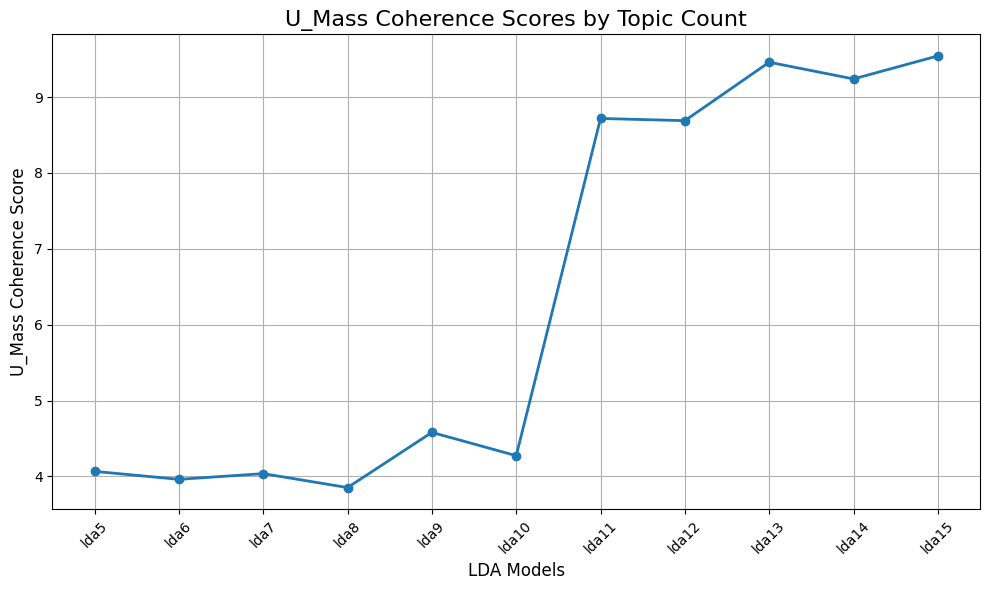

In [77]:
import matplotlib.pyplot as plt

# 数据准备
data = coherence_list

# 提取主题数量和对应的 u_mass 值
topics = [list(item.keys())[0] for item in data]
scores_minus = [list(item.values())[0] for item in data]
scores = [abs(score) for score in scores_minus]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(topics, scores, marker='o', linestyle='-', linewidth=2)
plt.title("U_Mass Coherence Scores by Topic Count", fontsize=16)
plt.xlabel("LDA Models", fontsize=12)
plt.ylabel("U_Mass Coherence Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


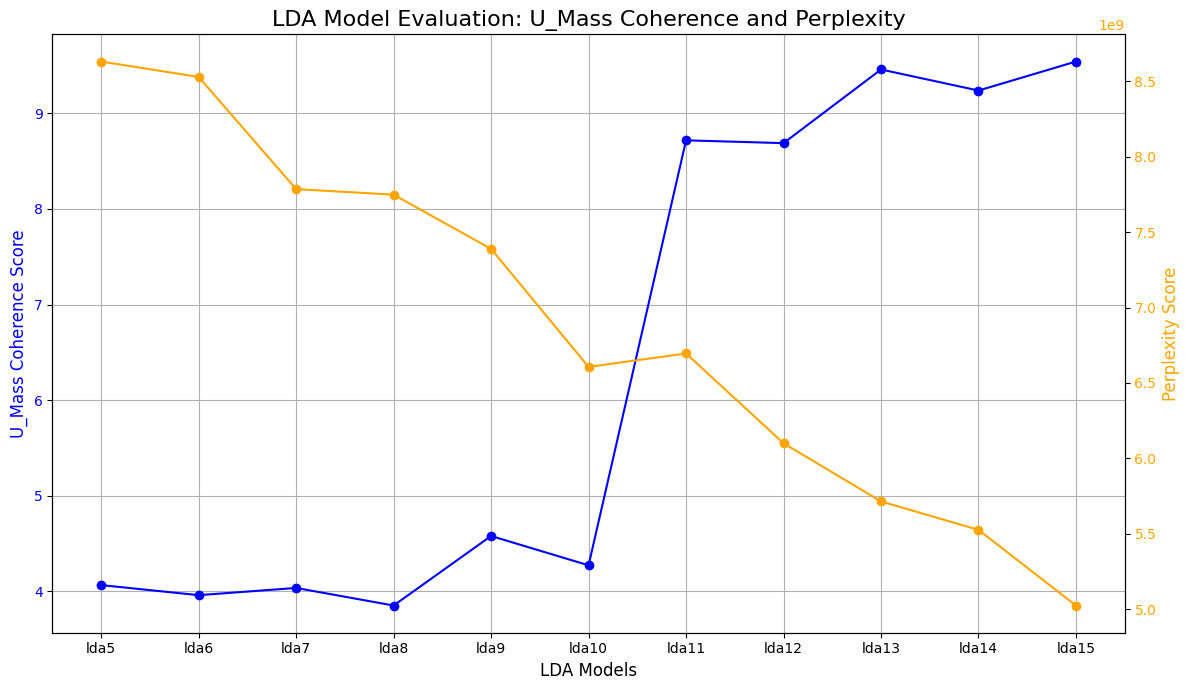

In [81]:
# 数据准备
u_mass_data = coherence_list
perplexity_data = perplexity_data = [
    {'lda15': 8629736511.697927},
    {'lda14': 8527627375.849385},
    {'lda13': 7784448689.555606},
    {'lda12': 7747584048.036576},
    {'lda11': 7388560068.952266},
    {'lda10': 6606449564.251324},
    {'lda9': 6695596550.1508255},
    {'lda8': 6100594209.817269},
    {'lda7': 5715243679.489574},
    {'lda6': 5526791469.719572},
    {'lda5': 5025627592.261732},
]

# 提取 U_Mass 数据
topics_u_mass = [list(item.keys())[0] for item in u_mass_data]
u_mass_scores = [abs(list(item.values())[0]) for item in u_mass_data]

# 提取 Perplexity 数据
topics_perplexity = [list(item.keys())[0] for item in perplexity_data]
perplexity_scores = [list(item.values())[0] for item in perplexity_data][::-1]

# 绘制双 Y 轴图形
fig, ax1 = plt.subplots(figsize=(12, 7))

# 左 Y 轴 (U_Mass Scores)
ax1.plot(topics_u_mass, u_mass_scores, marker='o', linestyle='-', color='blue', label='U_Mass Score')
ax1.set_xlabel("LDA Models", fontsize=12)
ax1.set_ylabel("U_Mass Coherence Score", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# 右 Y 轴 (Perplexity Scores)
ax2 = ax1.twinx()
ax2.plot(topics_perplexity, perplexity_scores, marker='o', linestyle='-', color='orange', label='Perplexity Score')
ax2.set_ylabel("Perplexity Score", fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 图例和标题
plt.title("LDA Model Evaluation: U_Mass Coherence and Perplexity", fontsize=16)
fig.tight_layout()

plt.show()


In [90]:
# 调用模型并打印每个主题最重要的词
def print_lda_topics(lda_model, dictionary, n_top_words):
    tword = []
    for topic_idx in range(lda_model.num_topics): # 遍历所有主题
        topic_word = []
        topic_str = 'topic ' + str(topic_idx)
        topic_word.append(topic_str)
        print("Topic #%d:" % topic_idx)
        topic_terms = lda_model.get_topic_terms(topic_idx, topn=n_top_words)
        topic_w = " ".join([dictionary[term_id] for term_id, _ in topic_terms])
        topic_word.append(topic_w)
        tword.append(topic_word)
        print(topic_w)
    return tword

lda = ldamodel.LdaModel.load(r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\lda9.model')
n_top_words = 30  # 每个主题打印多少词语
topic_word = print_lda_topics(lda, dictionary, n_top_words)
topic_30word_table = pd.DataFrame(data=topic_word, columns=['主题', '主题前30个高频词'])
table_30word_table_save_path = Path().resolve().parent/'resource'/'data'/'processed'/'topic_30word_table.xlsx'
topic_30word_table.to_excel(table_30word_table_save_path, index=False)

Topic #0:
全国 校园 领养 学院 组委会 大广赛 作者 行动者 玩法 行动 公益 有志 晚安 早安 启动 学校 种子 大学 开学 内卷 励志 视频 作品 语录 作品名称 微商 师范学院 能量 创业 协会
Topic #1:
作业 论文 考研 零食 现状 英语 正源 考试 疫苗 小组 数学 获得者 基金 心理健康 代理 称号 奖学 地产 废物 笔记 中华民族 做作业 辅导 数量 奶奶 自习室 家教 假装 小时 少女
Topic #2:
开学 学校 宿舍 视频 学生 回家 网课 图书馆 时间 作弊 考试 封校 大学 租房 手机 作业 校园 电影 感觉 学期 上学 室友 生活 背书 疫情 电影节 食堂 奶茶 主播 床上
Topic #3:
视频 问卷 女生 警方 女孩 学校 晚自习 失联 新闻 调查 学生 好好学习 通报 核酸 母亲 民警 父亲 方程式 网友 同学 爱情 事件 男子 期末考 女儿 小张 军训 检测 辅导员 校方
Topic #4:
生活 大学 孩子 诈骗 事情 父母 感觉 手机 工作 人生 朋友 副业 毕业 视频 学校 时间 学生 妈妈 大家 日子 校园 问题 世界 有点 社会 姐姐 网络 套路 同学 读书
Topic #5:
创业 工作 毕业 毕业生 企业 公司 专业 微商 岗位 人才 音乐 互联网 能力 大学 时间 项目 工资 行业 大赛 高校 视频 机会 团队 职场 培训 发展 学生 平台 问题 经验
Topic #6:
期末考试 压力 视频 衣服 男人 校园生活 身材 姐妹 消费 成绩 全职 女孩子 男朋友 方式 学校 校园 寒假 王者 贷款 主唱 星辰 综艺 生活 互联网 大学 女人 学生 速度 饭量 校园内
Topic #7:
疫情 活动 学院 志愿者 国家 学生 教育 高校 防控 社会 工作 服务 视频 同学 志愿 大学 社区 全国 教育部 学校 文化 精神 乡村 计划 校园 宣传 时代 发展 新冠 防疫
Topic #8:
考试 nan 链接 网页 状态 毕业论文 诚信 期末考试 手机 金融 投保 素养 寝室 大家 追星 团丁 医学生 性别 时代 咖啡 离谱 计算机 社畜 视频 投资 论文 题目 星人 学校 京报


In [91]:
# 可视化主题结果
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(vis_data, 'lda_pass9.html')
pyLDAvis.display(vis_data)


In [ ]:
# 计算文档-主题概率分布
def get_document_topics(lda_model, corpus):
    topics_distribution_list = []
    for doc in corpus:
        topics_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
        topics_distribution_list.append(topics_distribution)
    return topics_distribution_list
topics_distribution_list = get_document_topics(lda, corpus)

topics_info = []
for doc_id, doc_dist in enumerate(topics_distribution_list):
    doc_topics_info = [y for x,y in doc_dist]
    max_doc_topics = max(doc_dist, key= lambda x: x[1])[0]
    doc_topics_info.append(max_doc_topics)  
    topics_info.append(doc_topics_info)
topics_info

data = pd.DataFrame(data=topics_info)

In [ ]:
columns = [f'#{i}' for i in range(1,16)] + ['所属主题']
data.columns = columns

In [ ]:
data

In [ ]:
# 绘制词云图
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = r"D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\SimHei.ttf"


def plot_topic_wordcloud(lda_model, dictionary, num_topics):
    for topic_id in range(num_topics):
        plt.figure(figsize=(12,8))
        topic_terms = lda_model.get_topic_terms(topic_id, topn=30)
        topic_words = {dictionary[word_id]: prob for word_id, prob in topic_terms}
        
        # 指定 font_path 以支持中文显示
        wordcloud = WordCloud(font_path=font_path, width=1200, height=600, background_color='white').generate_from_frequencies(topic_words)
        
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Topic #{topic_id + 1}')
        plt.show()

# 调用函数
plot_topic_wordcloud(lda, dictionary, num_topics=15)


In [ ]:
fig_save_path = r'D:\MyDocument\桌面\高校师生思想行为变化趋势印象因素分析\resource\result\fig'
plt.plt.savefig(save_path, dpi=300, bbox_inches='tight') 

In [ ]:
# 计算主题强度随时间变化趋势

# 计算日期-主题强度
def get_document_topics(lda_model, corpus):
    doc_topics = lda_model.get_document_topics(corpus, minimum_probability=0)
    return doc_topics

doc_topics = get_document_topics(lda, corpus)

# 添加日期列并转换为日期时间类型
df['date'] = pd.to_datetime(df['date'])

# 创建时间段列，按十年分段
def get_decade(date):
    year = date.year
    # 5年
    period_start = (year // 5) * 5
    return f"{period_start}-{period_start + 4}"

    # #10年 
    # decade_start = (year // 10) * 10
    # return f"{decade_start}-{decade_start + 9}"

df['decade'] = df['date'].apply(get_decade)

# 初始化主题强度数据结构
topic_strength = {i: [] for i in range(lda.num_topics)}

# 遍历文档，计算每篇文档的主题分布并按时间段聚合
for doc_id, (decade, topic_dist) in enumerate(zip(df['decade'], doc_topics)):
    for topic_id, prob in topic_dist:
        topic_strength[topic_id].append((decade, prob))

# 聚合每个时间段的主题强度
aggregated_strength = {i: {} for i in range(lda.num_topics)}

for topic_id, decade_probs in topic_strength.items():
    DF = pd.DataFrame(decade_probs, columns=['decade', 'prob'])
    df_grouped = DF.groupby('decade').mean()
    aggregated_strength[topic_id] = df_grouped

# 绘制每个主题的强度随时间段变化的折线图
plt.figure(figsize=(14, 8))
for topic_id, df_grouped in aggregated_strength.items():
    plt.plot(df_grouped.index, df_grouped['prob'], label=f'Topic {topic_id}')

plt.xlabel('Decade')
plt.ylabel('Topic Strength')
plt.title('Topic Strength Over Decades')
plt.legend()
plt.show()